[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_yolov5.ipynb)

## 0. Preperation

- Install latest version of SAHI and YOLOv5:

In [ ]:
!pip install -U torch sahi yolov5

In [ ]:
import os
os.getcwd()

- Import required modules:

In [2]:
# arrange an instance segmentation model for test
from sahi.utils.yolov5 import (
    download_yolov5s6_model,
)

# import required functions, classes
from sahi.model import Yolov5DetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

- Download a yolov5 model and two test images:

In [3]:
# download YOLOV5S6 model to 'models/yolov5s6.pt'
yolov5_model_path = 'models/yolov5s6.pt'
download_yolov5s6_model(destination_path=yolov5_model_path)

# download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a YOLOv5 Model

- Instantiate a detection model by defining model weight path and other parameters:

In [4]:
detection_model = Yolov5DetectionModel(
    model_path=yolov5_model_path,
    confidence_threshold=0.3,
    device="cpu", # or 'cuda:0'
)

- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [5]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [8]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

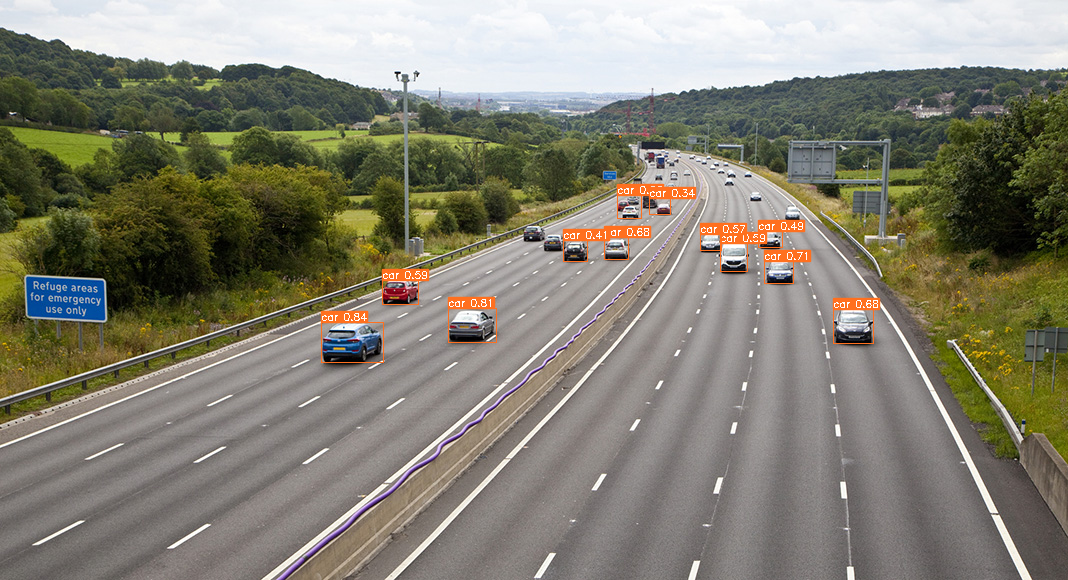

In [6]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a YOLOv5 Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [7]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Number of slices: 15


- Visualize predicted bounding boxes and masks over the original image:

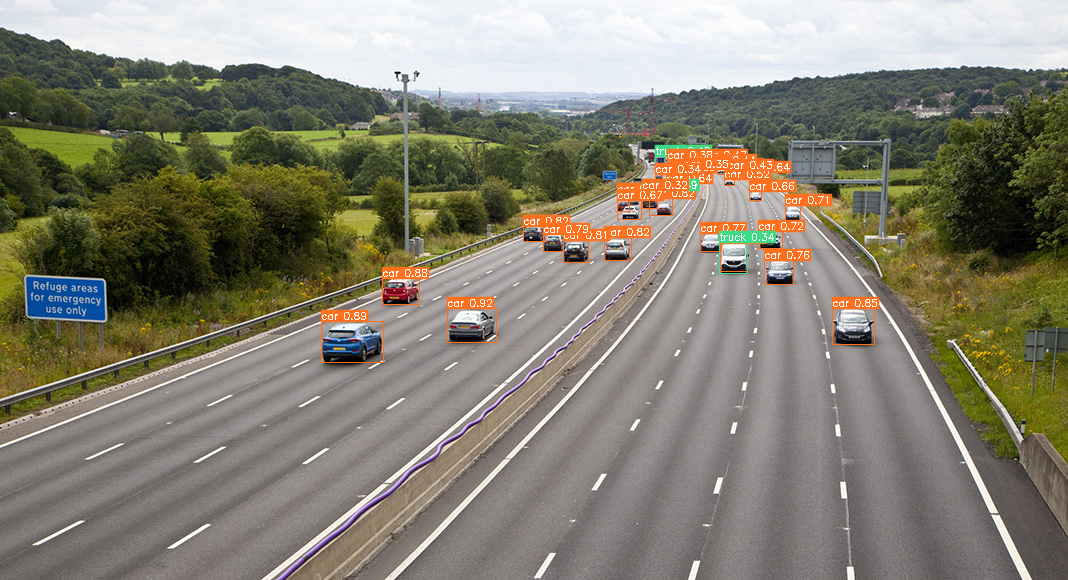

In [8]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [11]:
object_prediction_list = result.object_prediction_list

In [12]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(447, 308, 496, 342), w: 49, h: 34>,
    mask: None,
    score: PredictionScore: <value: 0.91552734375>,
    category: Category: <id: 2, name: car>>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [13]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [447, 308, 49, 34],
  'score': 0.91552734375,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1666},
 {'image_id': None,
  'bbox': [321, 321, 62, 41],
  'score': 0.8876953125,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2542},
 {'image_id': None,
  'bbox': [382, 278, 37, 26],
  'score': 0.8798828125,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 962}]

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [14]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [447, 308, 49, 34],
  'score': 0.91552734375,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1666},
 {'image_id': 1,
  'bbox': [321, 321, 62, 41],
  'score': 0.8876953125,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2542},
 {'image_id': 1,
  'bbox': [382, 278, 37, 26],
  'score': 0.8798828125,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 962}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [15]:
result.to_imantics_annotations()[:3]

- ObjectPrediction's can be converted to [fiftyone](https://github.com/voxel51/fiftyone) detection format:

In [16]:
result.to_fiftyone_detections()[:3]

[<Detection: {
     'id': '60eda8e918f4a1e447852ad1',
     'attributes': BaseDict({}),
     'tags': BaseList([]),
     'label': 'car',
     'bounding_box': BaseList([
         0.41853932584269665,
         0.5310344827586206,
         0.04588014981273408,
         0.05862068965517241,
     ]),
     'mask': None,
     'confidence': 0.91552734375,
     'index': None,
 }>,
 <Detection: {
     'id': '60eda8e918f4a1e447852ad2',
     'attributes': BaseDict({}),
     'tags': BaseList([]),
     'label': 'car',
     'bounding_box': BaseList([
         0.300561797752809,
         0.553448275862069,
         0.05805243445692884,
         0.0706896551724138,
     ]),
     'mask': None,
     'confidence': 0.8876953125,
     'index': None,
 }>,
 <Detection: {
     'id': '60eda8e918f4a1e447852ad3',
     'attributes': BaseDict({}),
     'tags': BaseList([]),
     'label': 'car',
     'bounding_box': BaseList([
         0.35767790262172283,
         0.4793103448275862,
         0.03464419475655431,
   

## 4. Batch Prediction

- Set model and directory parameters:

In [9]:
model_type = "yolov5"
model_path = yolov5_model_path
model_device = "cpu" # or 'cuda:0'
model_confidence_threshold = 0.4

slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [10]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 3 listed files in folder .


  0%|          | 0/3 [00:00<?, ?it/s]

Number of slices: 20


 33%|███▎      | 1/3 [00:02<00:05,  2.57s/it]

Number of slices: 15


 67%|██████▋   | 2/3 [00:04<00:02,  2.22s/it]

Number of slices: 15


100%|██████████| 3/3 [00:06<00:00,  2.16s/it]

Model loaded in 0.23004794120788574 seconds.
Slicing performed in 0.03141617774963379 seconds.
Prediction performed in 6.3324902057647705 seconds.
Exporting performed in 0.021288394927978516 seconds.
